<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Simulacion-I/blob/main/Muestreo_Importancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def f(x):
  return np.cos(np.pi*x/2)

### Se puede escribir la integral $I$ de una función $f$ de la siguiente manera:
$$I = \int_A f(x)dx = \int_A \frac{f(x)}{g(x)}g(x) dx = E_g\left[\frac{f(x)}{g(x)}\right],\quad g(x) \neq 0 \quad \forall x \in A$$
Usamos el estimador
$$\theta_3 = \frac{1}{N}\sum_{i = 1}^N\frac{f(x_i)}{g(x_i)}, \quad x_i \sim g(X)$$

Para este ejemplo, estimaremos el valor de la siguiente integral:
$$I = \int_0^1 \cos\left(\frac{\pi x}{2}\right)dx$$
Con
$$g(X) = \frac{24}{24 - \pi^2}\left(1 - \frac{\pi^2X^2}{8}\right)$$
La cual se obtiene de los primeros 2 términos de la serie de Taylor del coseno y posteriorment normalizándola en el intervalo [0, 1]\
La cual tiene un máximo $M$ en $x = 0$
$$M = \frac{24}{24 - \pi^2}$$

Distribución $g(X)$

In [33]:
def g(x):
  return abs(24/(24 - np.pi**2)*(1 - np.pi**2*x**2/8))

def G():
  M = 24/(24 - np.pi**2)
  while True:
    r1 = np.random.uniform()
    r2 = np.random.uniform()
    if r2 <= g(r1)/M:
      return r1

### Muestreo Importancia

In [40]:
def MI(n):
  x = 0
  for i in range(n):
    xi = G()
    x += f(xi)/g(xi)
  return x/n

### MC crudo

In [23]:
def MC_crudo(n):
  I = 0
  for i in range(n):
    I += f(np.random.uniform())
  return I/n

### Varianza de un método

In [24]:
def varianza(metodo, n, N):
  valores = [metodo(n) for _ in range(N)]
  return np.mean(valores), np.var(valores)

### Realizamos el experimento con $n = 100$ muestras y lo repetimos $N = 100$ veces en ambos casos

In [55]:
theta_1, var_theta_1 = varianza(MC_crudo, 100, 100)
theta_2, var_theta_2 = varianza(MI, 100, 100)

In [56]:
print(f"θ_1 = {theta_1}")
print(f"var(θ_1) = {var_theta_1}\n")

print(f"θ_2 = {theta_2}")
print(f"var(θ_2) = {var_theta_2}")

θ_1 = 0.6345219967087412
var(θ_1) = 0.0009745811984958344

θ_2 = 0.6129896222579417
var(θ_2) = 0.00023881227343594555


### Reducción de varianza

In [57]:
print(f"{100*abs(var_theta_1 - var_theta_2)/var_theta_1:.2f}%")

75.50%


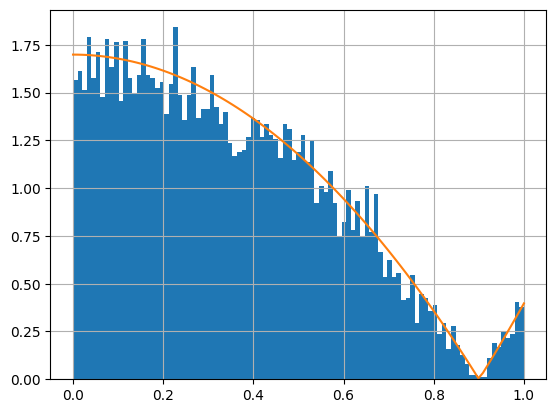

In [36]:
n = [G() for _ in range(10000)]
x = np.linspace(0, 1, 100)
plt.hist(n, bins=x, density=True)
plt.plot(x, g(x))
plt.grid()
plt.show()